<a href="https://colab.research.google.com/github/chimenjoku/Footballdata/blob/main/footballdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install statsbombpy
!pip install mplsoccer

In [4]:
import seaborn as sns
import pandas as pd

In [5]:
from statsbombpy import sb
import matplotlib.pyplot as plt

In [ ]:
sb.competitions()

In [ ]:
sb.matches(competition_id=2, season_id=44)

In [15]:
events = sb.events(3749431)

In [ ]:
events.columns

In [32]:
all_events_pass = events[['team', 'type','minute','location', 'pass_end_location','pass_angle', 'player', 'pass_outcome']]
all_events_shots = events[['team', 'type','minute','location','shot_end_location','shot_first_time','shot_freeze_frame','shot_outcome','shot_statsbomb_xg','shot_technique','shot_type']]
all_arsenal_pass = all_events_pass[(all_events_pass['team'] =='Arsenal' )& (all_events_pass ['type'] =='Pass' ) ].reset_index()
all_arsenal_shots = all_events_shots[(all_events_shots['team'] =='Arsenal')& (all_events_shots ['type'] =='Shot' )].reset_index()

509


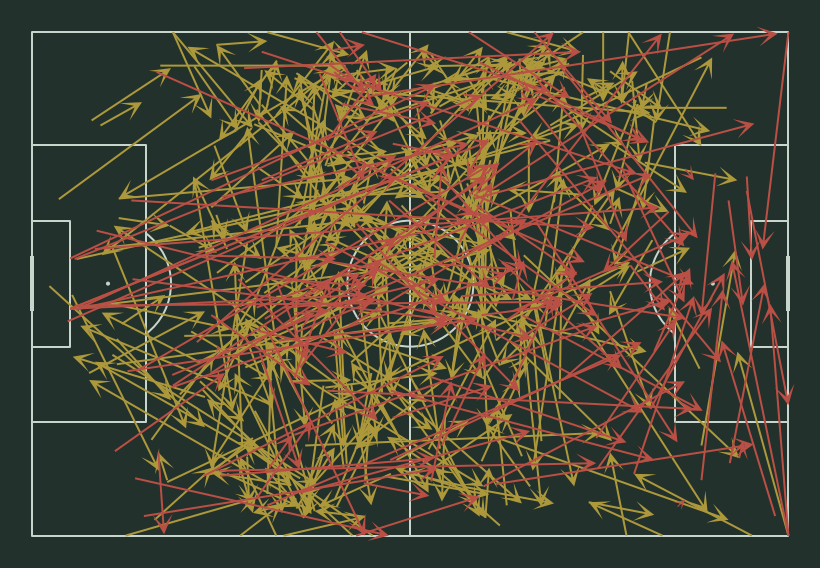

In [30]:
from mplsoccer.pitch import Pitch
df = pd.DataFrame(all_arsenal_pass)
df['location_x']=df['location'].str[0]
df['location_y']=df['location'].str[1]
df['pass_end_location_x']=df['pass_end_location'].str[0]
df['pass_end_location_y']=df['pass_end_location'].str[1]
print(df.shape[0])

mask_complete = df.pass_outcome.isnull()

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig,ax = pitch.draw(figsize=(13, 8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')


# Plot the completed passes
pitch.arrows(df[mask_complete]['location_x'], df[mask_complete]['location_y'],
             df[mask_complete]['pass_end_location_x'], df[mask_complete]['pass_end_location_y'], width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='completed passes')

# Plot the incomplete passes
pitch.arrows(df[~mask_complete]['location_x'], df[~mask_complete]['location_y'],
             df[~mask_complete]['pass_end_location_x'], df[~mask_complete]['pass_end_location_y'], width=2,
             headwidth=10, headlength=10, color='#ba4f45', ax=ax, label='other passes')



    index     team  type  minute       location   shot_end_location  \
0    3069  Arsenal  Shot      17  [100.2, 43.5]  [120.0, 44.9, 1.3]   
1    3071  Arsenal  Shot      33   [95.0, 19.1]  [120.0, 33.2, 0.2]   
2    3072  Arsenal  Shot      34   [92.9, 37.1]        [98.7, 37.9]   
3    3073  Arsenal  Shot      37  [103.8, 25.3]  [120.0, 46.5, 0.3]   
4    3075  Arsenal  Shot      44  [105.8, 33.9]  [120.0, 44.8, 0.2]   
5    3078  Arsenal  Shot      62  [116.9, 49.8]  [120.0, 44.1, 0.3]   
6    3079  Arsenal  Shot      65   [89.3, 32.6]       [109.1, 36.0]   
7    3081  Arsenal  Shot      73   [93.1, 55.2]        [96.4, 53.1]   
8    3083  Arsenal  Shot      75  [113.8, 33.3]  [118.3, 38.0, 1.3]   
9    3084  Arsenal  Shot      77   [96.6, 24.7]  [120.0, 45.4, 4.5]   
10   3086  Arsenal  Shot      92  [111.5, 43.0]  [120.0, 27.9, 0.4]   

   shot_first_time                                  shot_freeze_frame  \
0             True  [{'location': [115.9, 40.4], 'player': {'id': ...   
1

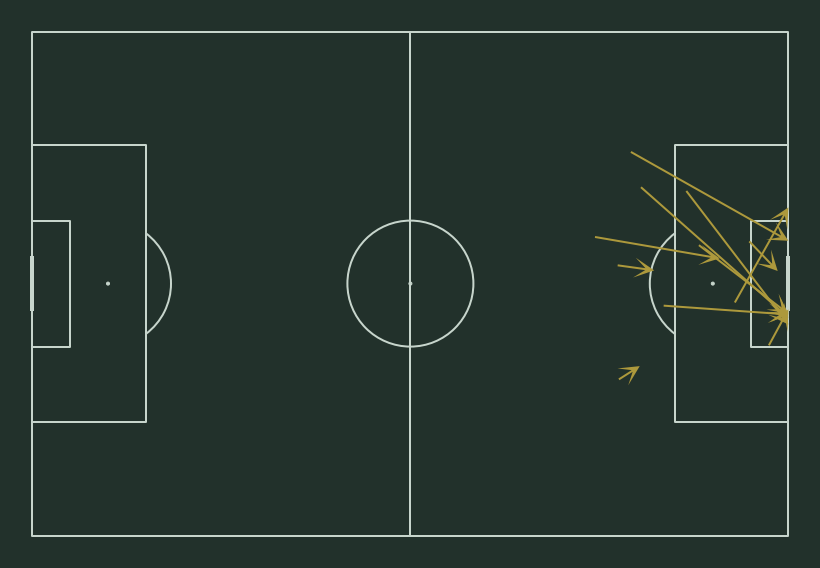

In [39]:
df = pd.DataFrame(all_arsenal_shots)
df['location_x']=df['location'].str[0]
df['location_y']=df['location'].str[1]
df['shot_end_location_x']=df['shot_end_location'].str[0]
df['shot_end_location_y']=df['shot_end_location'].str[1]

#this is how we create the pitch
pitch = Pitch(pitch_type='statsbomb',pitch_color='#22312b', line_color='#c7d5cc')
fig,ax = pitch.draw(figsize=(13, 8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
ax.patch.set_facecolor('#22312b')
print(all_arsenal_shots)

# Plot the shots
pitch.arrows(df['location_x'], df['location_y'],
             df['shot_end_location_x'], df['shot_end_location_y'], width=2,
             headwidth=10, headlength=10, color='#ad993c', ax=ax, label='shots')